<a href="https://colab.research.google.com/github/Harrisson3/Breast-Cancer-Dataset/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Labels


Dataset loaded successfully!

Training set size: 398
Testing set size: 171

Accuracy of GaussianNB: 0.9415204678362573

Confusion Matrix:
 [[108   2]
 [  8  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       110
           1       0.96      0.87      0.91        61

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



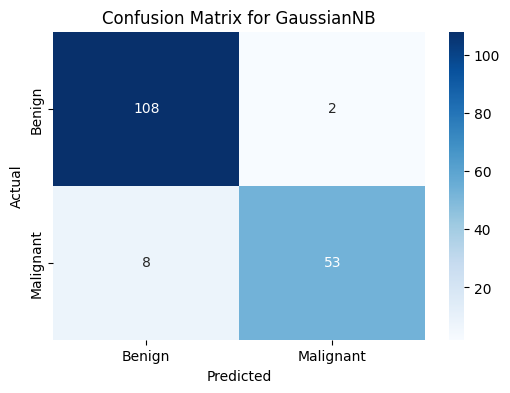


K-Fold Cross-Validation Scores (GaussianNB): [0.96491228 0.9122807  0.92982456 0.89473684 0.96491228 0.94736842
 0.94736842 0.9122807  0.94736842 0.875     ]
Mean Cross-Validation Accuracy (GaussianNB): 0.9296052631578947

Evaluating Multiple Models:
GaussianNB - Mean Cross-Validation Accuracy: 0.9296
KNeighborsClassifier - Mean Cross-Validation Accuracy: 0.9683
LogisticRegression - Mean Cross-Validation Accuracy: 0.9772
SVC - Mean Cross-Validation Accuracy: 0.9789


In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset from GitHub
url = "https://raw.githubusercontent.com/Harrisson3/Breast-Cancer-Dataset/main/data.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Step 3: Data Preprocessing
# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Convert 'diagnosis' column to numerical values (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features and target variable
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Labels

# Standardize the feature set for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Step 5: Check training and testing set sizes
print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Step 6: Create and train the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = nb.predict(X_test)

# Step 8: Evaluate the model
accuracy = nb.score(X_test, y_test)
print("\nAccuracy of GaussianNB:", accuracy)

# Step 9: Confusion Matrix & Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()

# Step 11: K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(nb, X, y, cv=kfold)
print("\nK-Fold Cross-Validation Scores (GaussianNB):", scores)
print("Mean Cross-Validation Accuracy (GaussianNB):", scores.mean())

# Step 12: Comparing Multiple Models
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

print("\nEvaluating Multiple Models:")
for model_name, model in estimators.items():
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f"{model_name} - Mean Cross-Validation Accuracy: {scores.mean():.4f}")
